In [1]:
from qiskit import *
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt, sin, cos
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os,sys
from collections import Counter
from collections import OrderedDict

0.5 pi {'110': 0.26953125, '011': 0.251953125, '101': 0.248046875, '000': 0.23046875}


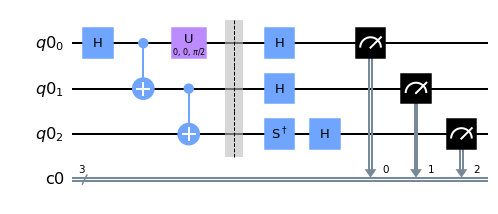

In [2]:
fi = 2*1/4*pi
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.cx(q[1],q[2])
qc.u(0, 0, fi, q[0])

qc.barrier(q)

#XXY    
qc.sdg(2)

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

backend1 = Aer.get_backend('qasm_simulator')
job1 = execute(qc, backend1, shots=1024)
result1 = job1.result()
count1 =result1.get_counts()
total1 = sum(count1.values(), 0.0)
count1 = {k: v / total1 for k, v in count1.items()}
qc.draw(output='mpl')
print(2*1/4,'pi',count1)
#    plot_histogram(count1)

0.5 pi {'100': 0.25390625, '010': 0.236328125, '111': 0.2607421875, '001': 0.2490234375}


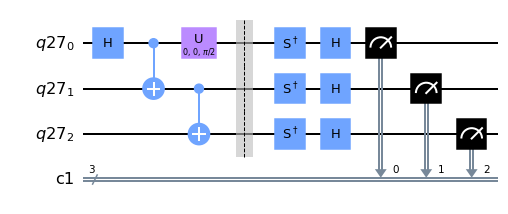

In [3]:

fi = 2*1/4*pi
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.cx(q[1],q[2])
qc.u(0, 0, fi, q[0])

qc.barrier(q)

#YYY    
qc.sdg(0)
qc.sdg(1)
qc.sdg(2)

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

backend2 = Aer.get_backend('qasm_simulator')
job2 = execute(qc, backend2, shots=1024)
result2 = job2.result()
count2 =result2.get_counts()
total2 = sum(count2.values(), 0.0)
count2 = {k: v / total2 for k, v in count2.items()}
qc.draw(output='mpl')
print(2*1/4,'pi',count2)
#    plot_histogram(count2)

0.5 pi {'010': 0.1259765625, '110': 0.1162109375, '111': 0.1123046875, '000': 0.1455078125, '011': 0.125, '100': 0.119140625, '101': 0.1337890625, '001': 0.1220703125}


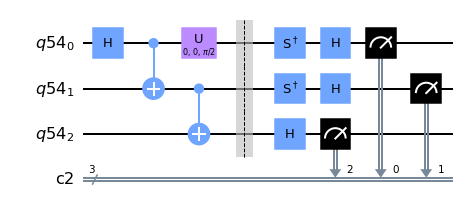

In [4]:

fi = 2*1/4*pi
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.cx(q[1],q[2])
qc.u(0, 0, fi, q[0])

qc.barrier(q)

#YYX   
qc.sdg(0)
qc.sdg(1)

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

backend3 = Aer.get_backend('qasm_simulator')
job3 = execute(qc, backend3, shots=1024)
result3 = job3.result()
count3 =result3.get_counts()
total3 = sum(count3.values(), 0.0)
count3 = {k: v / total3 for k, v in count3.items()}
qc.draw(output='mpl')
print(2*1/4,'pi',count3)
#    plot_histogram(count3)

0.5 pi {'001': 0.134765625, '011': 0.12890625, '010': 0.130859375, '000': 0.1201171875, '101': 0.1162109375, '100': 0.1181640625, '111': 0.1318359375, '110': 0.119140625}


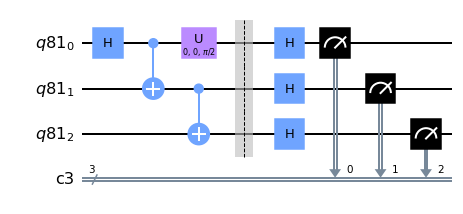

In [5]:

fi = 2*1/4*pi
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.cx(q[1],q[2])
qc.u(0, 0, fi, q[0])

qc.barrier(q)

#XXX
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

backend4 = Aer.get_backend('qasm_simulator')
job4 = execute(qc, backend4, shots=1024)
result4 = job4.result()
count4 =result4.get_counts()
total4 = sum(count4.values(), 0.0)
count4 = {k: v / total4 for k, v in count4.items()}
qc.draw(output='mpl')
print(2*1/4,'pi',count4)
#    plot_histogram(count4)

In [6]:
M3 = (Counter(count1)+Counter(count1)+Counter(count1)-Counter(count2))
M3p = (Counter(count3)+Counter(count3)+Counter(count3)-Counter(count4))
M3LR = 2**(3-1)
print (dict(M3))
print (dict(M3p))
M3ba=(M3['000']+M3['011']+M3['101']+M3['110']
      -M3['001']-M3['010']-M3['100']-M3['111'])
M3pba=(M3p['000']+M3p['011']+M3p['101']+M3p['110']
       -M3p['001']-M3p['010']-M3p['100']-M3p['111'])
print (M3ba)
print (M3pba)
print (M3ba/M3LR)
print (M3pba/M3LR)

{'110': 0.80859375, '011': 0.755859375, '101': 0.744140625, '000': 0.69140625}
{'010': 0.2470703125, '110': 0.2294921875, '111': 0.205078125, '000': 0.31640625, '011': 0.24609375, '100': 0.2392578125, '101': 0.28515625, '001': 0.2314453125}
3.0
0.154296875
0.75
0.03857421875
